In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Regresión lineal

In [ ]:
#Unidades de ventas de carros

car_prices = [5,6,7,8,9,10]
units_sold = [8.5,8.0,7.5,7.0,6.5,6.0]

#plot de esa relación
#plt.scatter(car_prices,units_sold)

#transformar a arreglo, luego a tensor
prices_array= np.array(car_prices).reshape(-1,1)
units_array= np.array(units_sold).reshape(-1,1)

#Transformar de arreglo a tensor

prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

#requires_grad_ es un metodo que se requiere para cuadrar el gradiente
#prices


tensor(1.5722e-07, grad_fn=<MseLossBackward>)


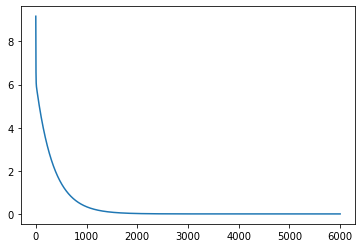

In [4]:
#Creación del modelo
#Linear recibe los tamaños de las dimensioness (entrada, salida)
model =nn.Linear(1,1)
loss_function = nn.MSELoss()
#Se trabaja con un batch, no con todos los datos
#lr = lating rate : pasos a dar en el gradiente 
optimizer = optim.SGD(model.parameters(), lr = 0.015)

losses = []
iterations = 6000
#Training loop
for i in range(iterations):
  #El modelo tiene como variable independiente a prices
  pred = model(prices)
  #Perdida se define como la relación entre la predicción y el real
  loss = loss_function(pred, units)
  #Agregamos data a losses para guardar
  losses.append(loss.data)
  #Se llevan a 0 los gradientes
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print (loss)
plt.plot(range(iterations),losses)


In [5]:
x = torch.Tensor([[20]]) # precio de 4 ( eje x)
p =model(x)
p

tensor([[1.0027]], grad_fn=<AddmmBackward>)

# Regresión logística
 

In [6]:
""" 
Clasificación de categorias (probabilidad)
Probabilidad de que suceda ___(algo).

sigmoid function: Para binario( 0 o 1) en terminos de probabilidades.
Se basa en la función logaritmo

Softmax (based on normalized exponential function):
De un vector K da una probabilidad para cada vector con intervalo (0,1)

Cross-entropy: Estimador de problabilidad
Modelar la función de lower pass y el error

"""

' \nClasificación de categorias (probabilidad)\nProbabilidad de que suceda ___(algo).\n\nsigmoid function: Para binario( 0 o 1) en terminos de probabilidades.\nSe basa en la función logaritmo\n\nSoftmax (based on normalized exponential function):\nDe un vector K da una probabilidad para cada vector con intervalo (0,1)\n\nCross-entropy: Estimador de problabilidad\nModelar la función de lower pass y el error\n\n'

(100, 2)

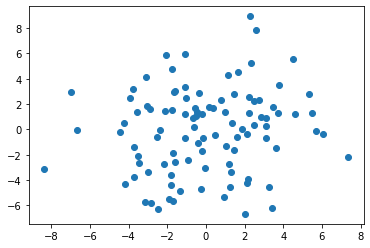

In [13]:
n= 100
h= n//2  # Queda en type=<int>
dimen = 2

data= np.random.randn(n,dimen)*3  # Para que quede entre 3.3 y -3.3
#data 

plt.scatter(data[:,0], data[:,1])
#print(data)
data[:,0:].shape

(100, 2)

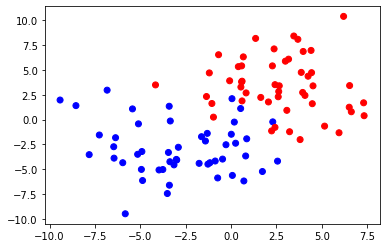

In [8]:
#"expandimos" las dos opciones a 3 y -3 para hacerlos diferenciar más
data[:h, :] = data[:h,:] - 3*np.ones((h,dimen)) 
data[h:, :] = data[h:,:] + 3*np.ones((h,dimen))

#Agregar colores 
colors =["blue", "red"]
color = np.array([colors[0]]*h+[colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color  )
data.shape

tensor(0.0001, grad_fn=<BinaryCrossEntropyBackward>)

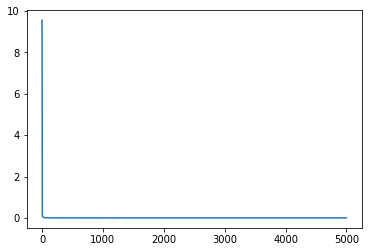

In [ ]:
#target ahora funcipna como el color, ahora es una probabilidad
target = np.array([0]*h+[1]*h).reshape(n,1)

#tensores de de entrada y de salida
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()

#x.shape, y.shape

#Creación de modelo
model = nn.Sequential(   ##Combina varias funciones
        nn.Linear(2,1),  #ya que son pares
        nn.Sigmoid()     #Aplica la función
)

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.01)

losses =[]
iterations = 5000

for i in range(iterations):
  result = model(x)
  loss = loss_function(result,y)
  losses.append(loss.data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(iterations),losses)
loss

Poner a prueba el modelo

In [ ]:

blue = torch.Tensor([[-5,-6]])

#Prediction es un bool que colorea azul o rojo
prediction = model(blue).data[0][0]>0.5
#prediction   # Es una probabilidad de si es rojo o azul
print(colors[prediction])
#Prueba 2 
red = torch.Tensor([[5,10]])
prediction = model(red).data[0][0]>0.5
print(colors[prediction])

blue
red


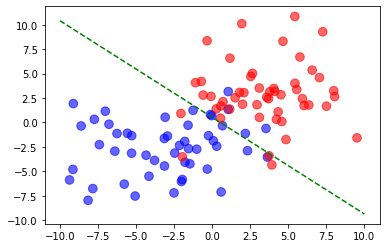

In [ ]:
#Grafica de como esta funcionando el modelo
w = list(model.parameters())
w0 =w[0].data.numpy()
w1 =w[1].data.numpy()

plt.scatter(data[:,0],data[:,1], c=color, s=75, alpha=0.6)

x_axis =np.linspace(-10,10,n)
y_axis = -(w1[0]+ x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis, 'g--')
